# 4. Automatic Peak Detection

If there are a lot of peaks in a spectrum it can be tedious to manually specify thier locations in order to do a fit. Auto peak detection can generate a list of `PeakParams` so reducing this work somewhat.

## 4.1. Detecting peaks


Peaks are detected from a spectrum so the first thing to do is to load up a `FitSpectrum` object.

Diffraction pattern successfully loaded from file.


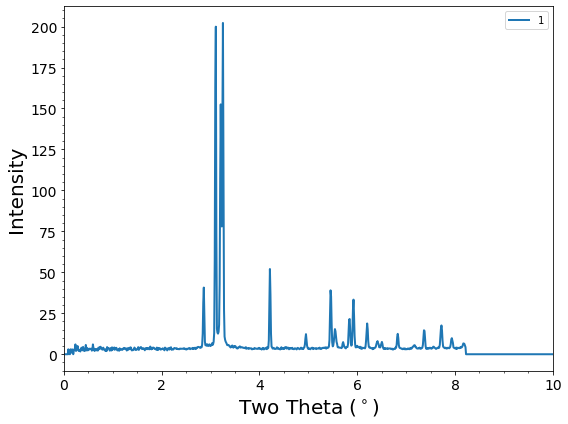

In [1]:
%matplotlib inline

import sys
sys.path.append('./..')

import spectrum_fitting
from spectrum_fitting import PeakParams


spectral_data = spectrum_fitting.FitSpectrum('../example_data/adc_041_7Nb_NDload_700C_15mms_00001.dat', 90)
spectral_data.plot(1)

We can see that the region of interest lies between 2.5 and 8 so the first step is to constrain to this region.

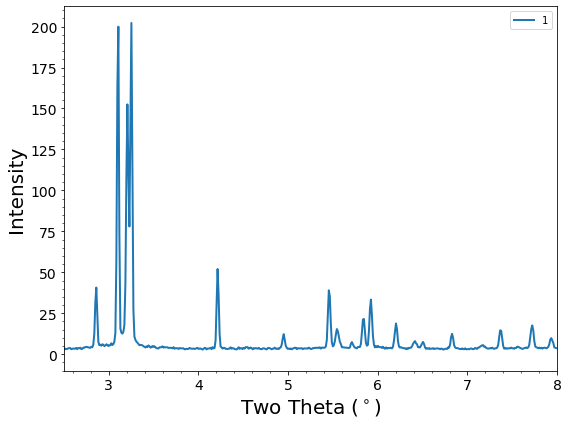

In [2]:
spectral_data.plot(1, (2.5, 8))

Now we use the `detect_peaks` method of the `FitSpectrum` to get some estimated PeakParams.

In [3]:
spectral_data.detect_peaks(1, (2.5, 8))

[PeakParams('0', (2.81, 2.92)),
PeakParams('4', (4.15, 4.28)),
PeakParams('5', (4.88, 5.02)),
PeakParams('6', (5.38, 5.53)),
PeakParams('7', (5.45, 5.63)),
PeakParams('8', (5.64, 5.78)),
PeakParams('9', (5.77, 5.92)),
PeakParams('10', (5.84, 6.0)),
PeakParams('11', (6.12, 6.28)),
PeakParams('12', (6.3, 6.53)),
PeakParams('13', (6.44, 6.57)),
PeakParams('14', (6.75, 6.91)),
PeakParams('15', (7.04, 7.31)),
PeakParams('16', (7.29, 7.44)),
PeakParams('17', (7.63, 7.81)),
PeakParams('18', (7.85, 8.02))]


These PeakParams aren't likely to be perfect, some peaks may be missed or misidentified so it is worth plotting them to check that they are OK. In general the fits work best where there is at least 5 data points at the baseline either side of the peak. Where peaks are closer together than this it can often be better to combine the peaks into a multiplet fit rather than trying to fit them seperately.

Here the graph is a bit small to see the detail so I chop it up into a couple of subsections to evaluate the quality of the estimated PeakParams.

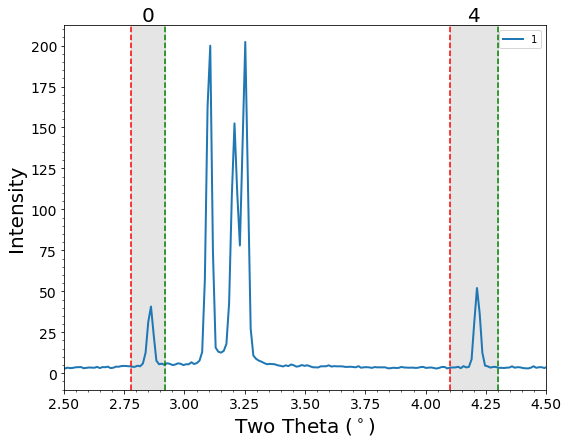

In [4]:
spectral_data.plot_peak_params([PeakParams('0', (2.78, 2.92)),
                                PeakParams('4', (4.10, 4.30))], 
                               1, (2.5, 4.5))

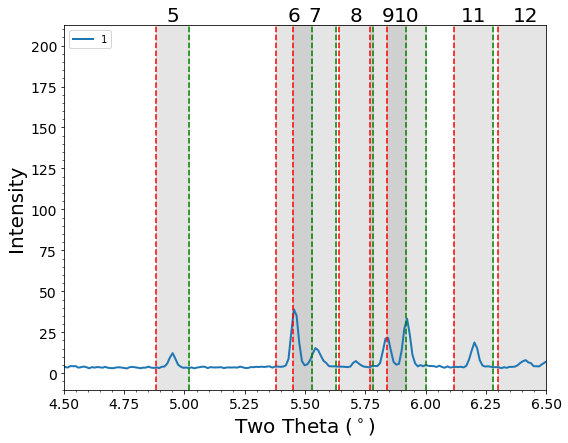

In [5]:
spectral_data.plot_peak_params([PeakParams('5', (4.88, 5.02)),
                                PeakParams('6', (5.38, 5.53)),
                                PeakParams('7', (5.45, 5.63)),
                                PeakParams('8', (5.64, 5.78)),
                                PeakParams('9', (5.77, 5.92)),
                                PeakParams('10', (5.84, 6.0)),
                                PeakParams('11', (6.12, 6.28)),
                                PeakParams('12', (6.3, 6.53))], 
                               1, (4.5, 6.5))

Here the peak finding algorithm has made some of the `PeakParams` too wide so I cut these down a bit.

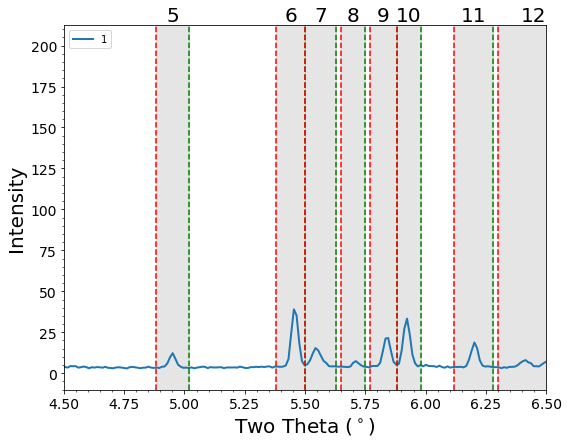

In [6]:
spectral_data.plot_peak_params([PeakParams('5', (4.88, 5.02)),
                                PeakParams('6', (5.38, 5.50)),
                                PeakParams('7', (5.50, 5.63)),
                                PeakParams('8', (5.65, 5.75)),
                                PeakParams('9', (5.77, 5.88)),
                                PeakParams('10', (5.88, 5.98)),
                                PeakParams('11', (6.12, 6.28)),
                                PeakParams('12', (6.30, 6.60))], 
                               1, (4.5, 6.5))

Peaks 6 and 7 and peaks 9 and 10 are overlapping at the edges so I would be inclined to fit these as doublets.

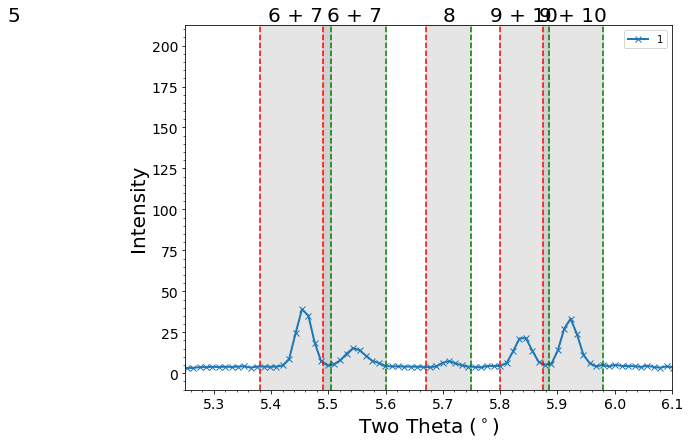

In [7]:
spectral_data.plot_peak_params([PeakParams('5', (4.88, 5.02)),
                                PeakParams('6 + 7', (5.38, 5.65), 2, {"1_min":5.38, "1_max":5.505, "2_min":5.49, "2_max":5.60}),
                                PeakParams('8', (5.67, 5.75)),
                                PeakParams('9 + 10', (5.75, 6.05), 2, {"1_min":5.8, "1_max":5.885, "2_min":5.875, "2_max":5.98})
                               ],
                               1, (5.25, 6.1), show_points=True)

Now the middle is sorted, just need to tweak the end of the spectrum. Here are the estimated points:

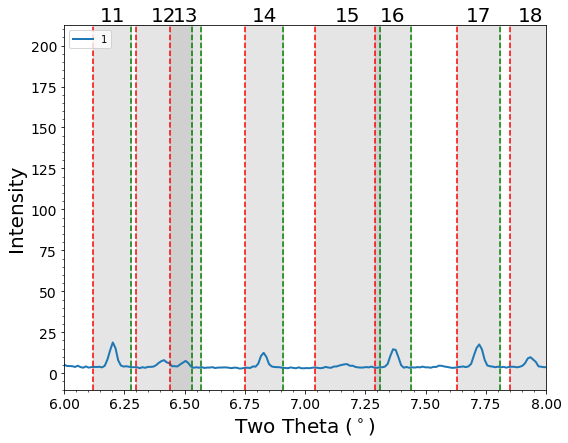

In [8]:
spectral_data.plot_peak_params([PeakParams('11', (6.12, 6.28)),
                                PeakParams('12', (6.3, 6.53)),
                                PeakParams('13', (6.44, 6.57)),
                                PeakParams('14', (6.75, 6.91)),
                                PeakParams('15', (7.04, 7.31)),
                                PeakParams('16', (7.29, 7.44)),
                                PeakParams('17', (7.63, 7.81)),
                                PeakParams('18', (7.85, 8.02))],
                              1, (6.0, 8.0))

Again, 12 and 13 are probably a good doublet while 15 is too small so I decide to remove it.

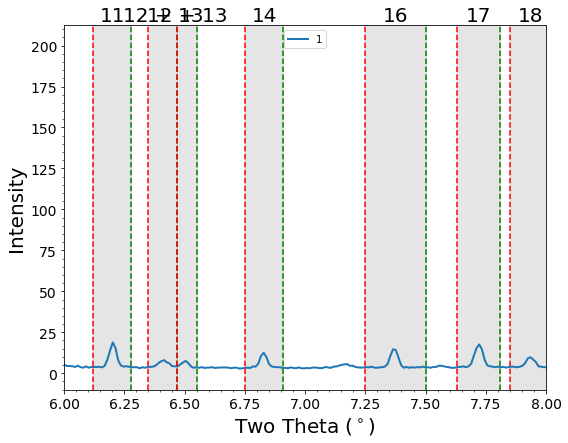

In [9]:
spectral_data.plot_peak_params([PeakParams('11', (6.12, 6.28)),
                                PeakParams('12 + 13', (6.30, 6.60), 2, {"1_min":6.35, "1_max":6.47, "2_min":6.47, "2_max":6.55}),
                                PeakParams('14', (6.75, 6.91)),
                                PeakParams('16', (7.25, 7.50)),
                                PeakParams('17', (7.63, 7.81)),
                                PeakParams('18', (7.85, 8.02))],
                              1, (6.0, 8.0))

Finally I collate the adjusted PeakParams, renumber them (you might want to put physicall meaningful names here like crystal lattice names) and then run the fit. At this point, if any of the fits look off you can tweak the parameters here. It is up to you how much time you want to spend - it may well be the case that a perfect fit is unimportant in the grand scale of things and an adequate fit is enough.

Fitting complete.


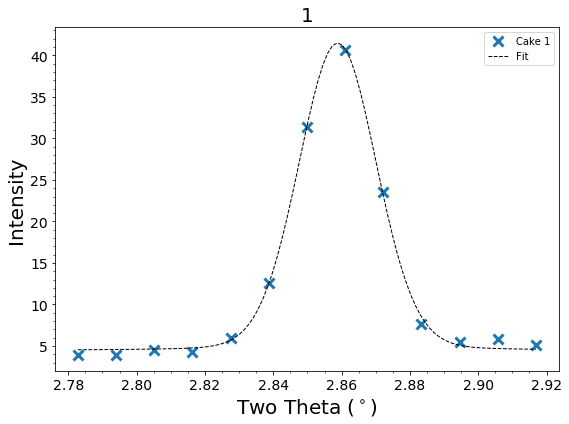

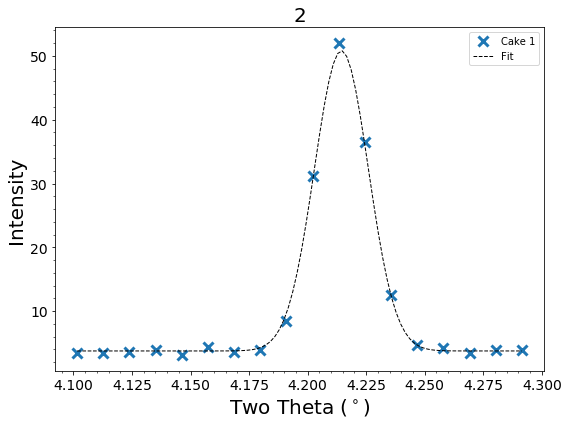

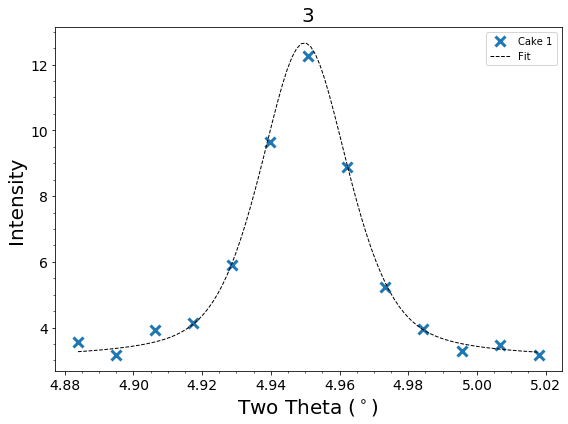

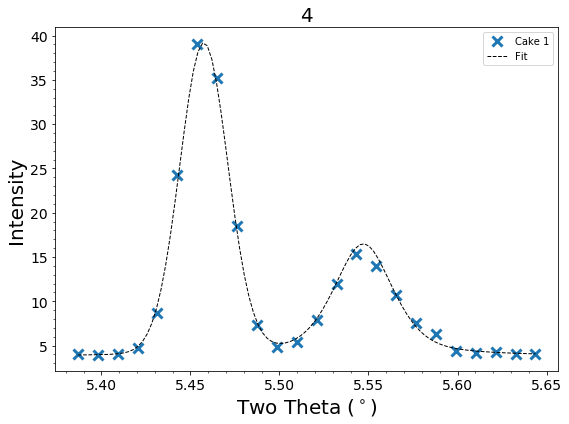

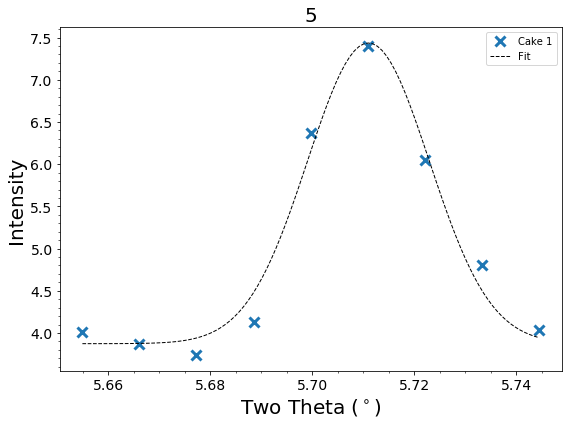

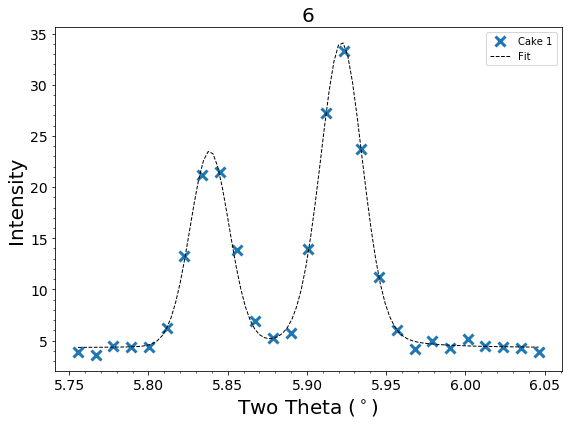

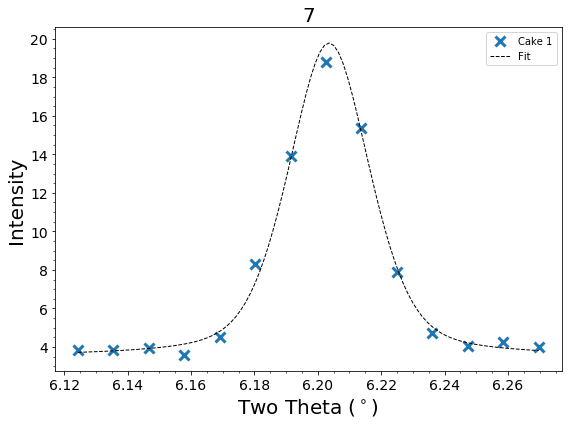

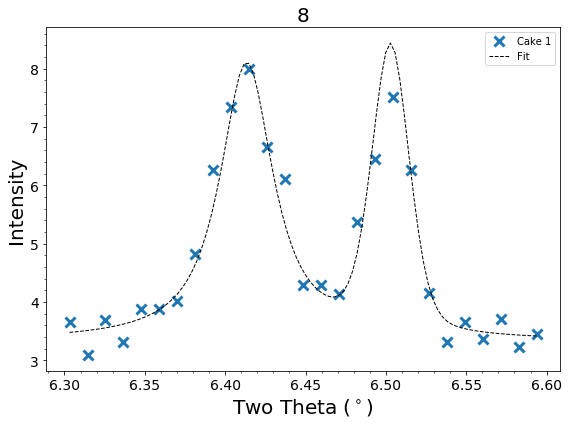

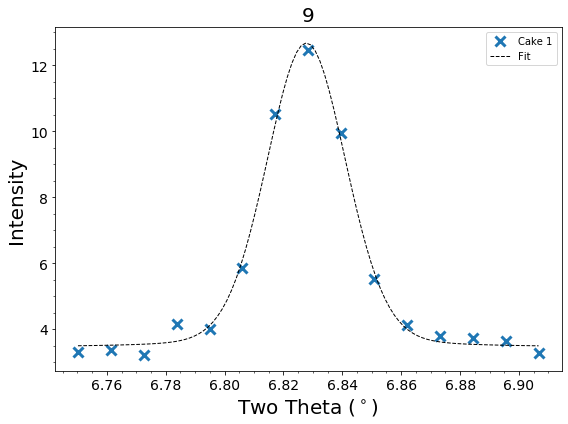

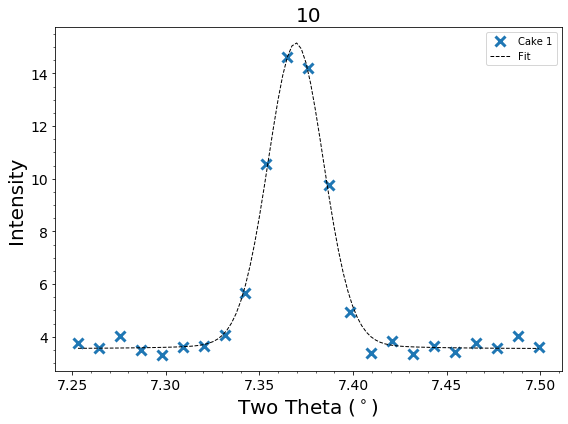

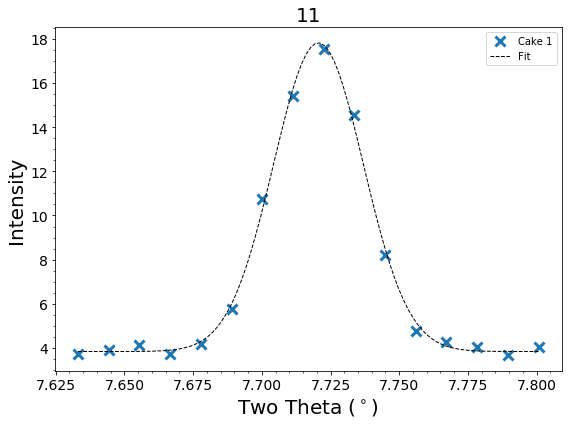

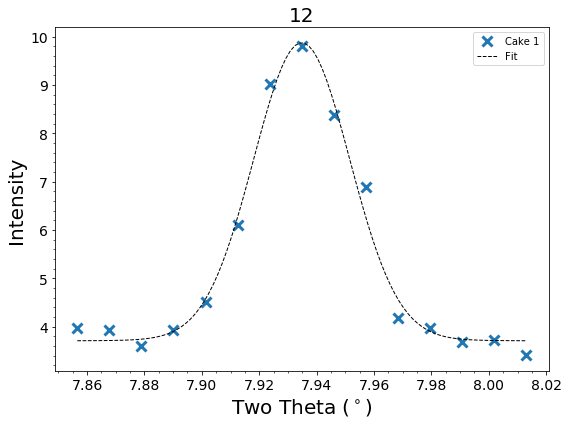

In [10]:
peak_params = [PeakParams('1', (2.78, 2.92)),
               PeakParams('2', (4.10, 4.30)),
               PeakParams('3', (4.88, 5.02)),
               PeakParams('4', (5.38, 5.65), 2, {"1_min":5.38, "1_max":5.505, "2_min":5.49, "2_max":5.60}),
               PeakParams('5', (5.65, 5.75)),
               PeakParams('6', (5.75, 6.05), 2, {"1_min":5.8, "1_max":5.885, "2_min":5.875, "2_max":5.98}),
               PeakParams('7', (6.12, 6.28)),
               PeakParams('8', (6.30, 6.60), 2, {"1_min":6.35, "1_max":6.47, "2_min":6.46, "2_max":6.55}),
               PeakParams('9', (6.75, 6.91)),
               PeakParams('10', (7.25, 7.50)),
               PeakParams('11', (7.63, 7.81)),
               PeakParams('12', (7.85, 8.02))]
spectral_data.fit_peaks(peak_params, 1)

for fit in spectral_data.fitted_peaks:
    fit.plot()